In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,RocCurveDisplay
)

In [2]:
X,y = make_classification(n_samples=5000,n_features=5,n_classes=2,random_state=42)

In [3]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
y_pred = clf.predict(X_test)

In [7]:
cm = confusion_matrix(y_test,y_pred)

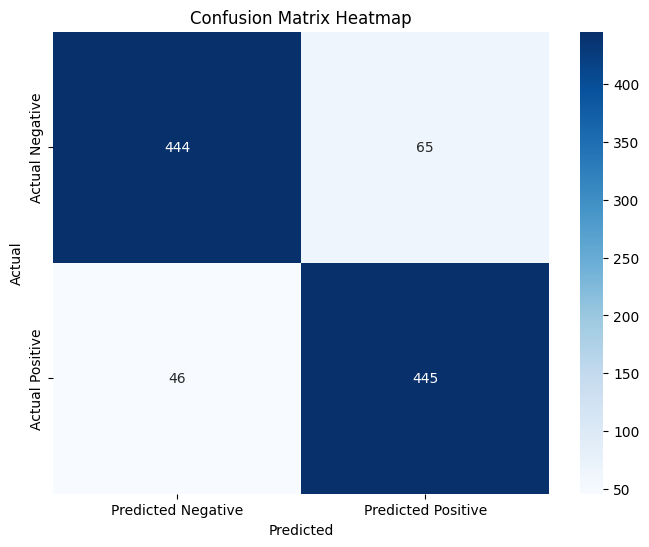

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [9]:
tn, fp, fn, tp = cm.ravel()
print(f"True Positives (TP): {tp}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Negatives (TN): {tn}")

True Positives (TP): 445
False Positives (FP): 65
False Negatives (FN): 46
True Negatives (TN): 444


In [10]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.889
Precision: 0.8725490196078431
Recall: 0.9063136456211812
F1 Score: 0.8891108891108891
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       509
           1       0.87      0.91      0.89       491

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000



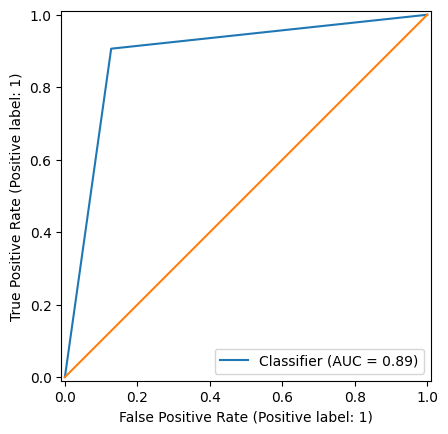

In [11]:
RocCurveDisplay.from_predictions(y_test, clf.predict(X_test))
plt.plot([0, 1], [0, 1])
plt.show()